In [1]:
1 + 2 + 3

6

# Pythonkurs

Velg celletype i menyen:

- **Code** betyr Pythonkode
- **Markdown** betyr tekst

In [2]:
print("Hei alle sammen!")

Hei alle sammen!


In [3]:
"Hei"

'Hei'

In [4]:
[1, 2, 3]

[1, 2, 3]

In [5]:
navn = "Geir Arne Hjelle"

In [6]:
navn

'Geir Arne Hjelle'

In [7]:
"Hei, " + navn

'Hei, Geir Arne Hjelle'

In [8]:
f"Hei, {navn}"

'Hei, Geir Arne Hjelle'

# pandas og lesing av Excelark

- Importer pandas
- Les Excelarket

In [9]:
import pandas as pd

In [10]:
2 + 2

4

In [11]:
data = pd.read_excel(
    "kap1.xlsx", 
    engine="openpyxl",
    sheet_name="1.2",
    header=4,
    usecols="A:C",
    nrows=19,
)
data

Budsjettiltak Lån og garantier
0           India            0.7                0
1       Frankrike            0.7             13.9
2        Russland            0.9              0.6
3          Spania            1.2              9.8
4          Italia            1.2             32.4
5           Korea            1.5              6.4
6         Finland            1.7              5.4
7            Kina            2.5                0
8       Nederland            2.7                -
9          Brasil            2.9              4.2
10  Storbritannia            3.1             15.7
11        Sverige            3.4                5
12       Tyskland            4.4             29.6
13        Danmark            4.9              5.3
14          Norge            5.1                4
15         Canada            5.2              3.3
16            USA            6.9              4.2
17          Japan           10.0             10.4
18      Australia           10.6              1.9

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0                     19 non-null     object 
 1   Budsjettiltak     19 non-null     float64
 2   Lån og garantier  19 non-null     object 
dtypes: float64(1), object(2)
memory usage: 584.0+ bytes


In [13]:
data.Budsjettiltak

0      0.7
1      0.7
2      0.9
3      1.2
4      1.2
5      1.5
6      1.7
7      2.5
8      2.7
9      2.9
10     3.1
11     3.4
12     4.4
13     4.9
14     5.1
15     5.2
16     6.9
17    10.0
18    10.6
Name: Budsjettiltak, dtype: float64

In [14]:
data["Lån og garantier"]

0        0
1     13.9
2      0.6
3      9.8
4     32.4
5      6.4
6      5.4
7        0
8        -
9      4.2
10    15.7
11       5
12    29.6
13     5.3
14       4
15     3.3
16     4.2
17    10.4
18     1.9
Name: Lån og garantier, dtype: object

In [15]:
data.loc[3]

                    Spania
Budsjettiltak          1.2
Lån og garantier       9.8
Name: 3, dtype: object

# Pause til 10:43

In [16]:
data = pd.read_excel(
    "kap1.xlsx", 
    engine="openpyxl",
    sheet_name="1.2",
    header=4,
    usecols="A:C",
    nrows=19,
    index_col=0,
)
data

Budsjettiltak Lån og garantier
                                             
India                    0.7                0
Frankrike                0.7             13.9
Russland                 0.9              0.6
Spania                   1.2              9.8
Italia                   1.2             32.4
Korea                    1.5              6.4
Finland                  1.7              5.4
Kina                     2.5                0
Nederland                2.7                -
Brasil                   2.9              4.2
Storbritannia            3.1             15.7
Sverige                  3.4                5
Tyskland                 4.4             29.6
Danmark                  4.9              5.3
Norge                    5.1                4
Canada                   5.2              3.3
USA                      6.9              4.2
Japan                   10.0             10.4
Australia               10.6              1.9

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, India to Australia
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Budsjettiltak     19 non-null     float64
 1   Lån og garantier  19 non-null     object 
dtypes: float64(1), object(1)
memory usage: 456.0+ bytes


In [18]:
data.loc["Norge"]

Budsjettiltak       5.1
Lån og garantier      4
Name: Norge, dtype: object

In [19]:
data.iloc[3]

Budsjettiltak       1.2
Lån og garantier    9.8
Name: Spania, dtype: object

# Del 2

In [20]:
import pandas as pd

data = pd.read_excel(
    "kap1.xlsx", 
    engine="openpyxl",
    sheet_name="1.2",
    header=4,
    usecols="A:C",
    nrows=19,
    index_col=0,
    na_values="-",
).rename(
    columns={
        "Budsjettiltak": "tiltak",
        "Lån og garantier": "lån",
    }
)
data = data.fillna(data["lån"].mean())

In [21]:
budsjett = data.assign(
    total=data.tiltak + data.lån
).sort_values(by="total")

<AxesSubplot: xlabel=' '>

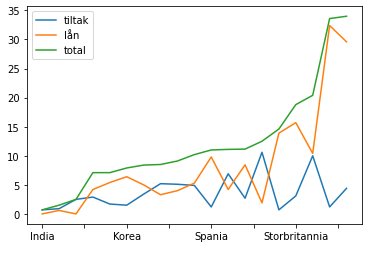

In [22]:
budsjett.plot()

# Pause til 12:06

Avslutter kurset til 12:45

# Større datasett: Oslo Bysykkel

In [23]:
data = pd.read_csv(
    "11.csv",
    parse_dates=["started_at", "ended_at"]
)

In [24]:
data.groupby("start_station_name", as_index=False).agg(
    median_duration=("duration", "median"),
    max_duration=("duration", "max"),
    num_trips=("start_station_id", "size"),
).sort_values(by="median_duration")

start_station_name  median_duration  max_duration  num_trips
90       Hausmanns bru            270.0          7930        244
106     Jarlsborgveien            294.0          3675         46
126          Lakkegata            335.0         16873        468
177          Saga Kino            336.0          7326        577
55          Enerhaugen            337.0          5939        243
..                 ...              ...           ...        ...
256       Økern Portal            969.0          2931         46
154  Norsk Folkemuseum           1033.0          7063         89
146    Maritimt Museum           1667.5          3264         48
100              Huk 1           1783.5          3454         28
101              Huk 2           1815.0          3477         27

[257 rows x 4 columns]

In [25]:
turer = (
    data.groupby(
        ["start_station_name", "end_station_name"],
        as_index=False,
    )
    .size()
    .sort_values(by="size")
    .query("size > 0")
)

In [26]:
turer

start_station_name      end_station_name  size
7395   Hans Nielsen Hauges plass    Lille Schous plass     1
8842                 Jakob kirke            Enerhaugen     1
8843                 Jakob kirke            Ensjøveien     1
17730   St. Hanshaugen park vest             Paléhaven     1
8845                 Jakob kirke        Filipstadveien     1
...                          ...                   ...   ...
21480           Vippetangen vest  Sjøsiden ved trappen   106
18849                Sukkerbiten  Sjøsiden ved trappen   111
6028              Frognerstranda            Tjuvholmen   112
9285              Jernbanetorget      Vippetangen vest   112
19541                 Tjuvholmen        Frognerstranda   138

[21940 rows x 3 columns]

In [27]:
turer.pivot_table(
    index="start_station_name",
    columns="end_station_name",
    values="size",
    fill_value=0,
)

end_station_name       7. juni-plassen  AHO  Adamstuen  Aker Brygge  \
start_station_name                                                    
7. juni-plassen                      4    2          0            1   
AHO                                  2   12          0           19   
Adamstuen                            2    0          0            0   
Aker Brygge                          4    8          0           44   
Akerselvallmenningen                 1    2          0           27   
...                                ...  ...        ...          ...   
Volvat                               0    0          1            0   
Vulkan                               6    4          0           28   
Vålerenga                            0    0          0            0   
Vår Frelsers gravlund                6    5          0           18   
Økern Portal                         0    0          0            6   

end_station_name       Akerselvallmenningen  Alexander Kiellands Plass  \
start_station_name                                                       
7. juni-plassen                           0                         19   
AHO                                       3                          8   
Adamstuen                                 0                          1   
Aker Brygge                              23                          9   
Akerselvallmenningen                     13                          1   
...                                     ...                        ...   
Volvat                                    0                          0   
Vulkan                                    1                         14   
Vålerenga                                 2                          0   
Vår Frelsers gravlund                     8                          1   
Økern Portal                              1                          0   

end_station_name       Anker Hotel  Annette Thommessens Plass  Arendalsgata  \
start_station_name                                                            
7. juni-plassen                  1                          1             0   
AHO                              5                          7             1   
Adamstuen                        0                          0             1   
Aker Brygge                      1                         17             2   
Akerselvallmenningen             2                          0             0   
...                            ...                        ...           ...   
Volvat                           0                          0             1   
Vulkan                           3                          1             1   
Vålerenga                        0                          0             0   
Vår Frelsers gravlund            0                          1             2   
Økern Portal                     0                          0             0   

end_station_name       Arkaden Nord  ...  Vaterlandsparken  Vestkanttorvet  \
start_station_name                   ...                                     
7. juni-plassen                   1  ...                 2               7   
AHO                               9  ...                 9               0   
Adamstuen                         0  ...                 0               0   
Aker Brygge                       5  ...                 1               2   
Akerselvallmenningen              2  ...                 2               1   
...                             ...  ...               ...             ...   
Volvat                            0  ...                 0               0   
Vulkan                            2  ...                 8               0   
Vålerenga                         0  ...                 2               0   
Vår Frelsers gravlund             3  ...                 2               2   
Økern Portal                      1  ...                 1               0   

end_station_name       Via Vika  Vippetangen vest  Vippetangen øst  Vo